In [1]:
# test the fitting:
# Chi2 on lag-hr, hard bound = False

In [2]:
import pickle
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from optimization_utils import param_vec_to_dict, make_boundary
import scipy.optimize as opt
import scipy.stats as st

In [3]:
folder = "0914_RT_100_100/"

In [4]:
file_list = glob.glob(folder + "outfiles/*data*.pkl")
file_list = [i.replace(folder + "outfiles/","") for i in file_list]
file_list = [i.replace(".pkl","") for i in file_list]
file_list = [tuple(map(int,i.split("data"))) for i in file_list]
file_list.sort()
# file_list

In [5]:
pso_df = pd.DataFrame(columns = ['iter','particle','err'])
_, _, what_to_fit = make_boundary()

for iter, p in file_list:
    path = folder + "outfiles/" + str(iter) + "data" + str(p) + ".pkl" 
    with open(path, 'rb') as inp:
        data = pickle.load(inp)
    if len(data) != 0:
        err = data['err']
        params = data['params']
        row_dict = {"iter":iter,"particle":p,"err":err}
        row_dict.update({what_to_fit[i]:params[i] for i in range(len(params))})
        pso_df = pso_df.append(row_dict,ignore_index=True)
    
pso_df

,iter,particle,err,b,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
0,1.0,0.0,1325.919182,27.074613,0.442749,0.633471,0.446077,0.949797,0.185288,0.634034
1,1.0,1.0,694.757548,0.899130,0.601255,0.656322,0.915764,0.785979,0.698507,0.894857
2,1.0,2.0,1370.736234,58.783406,0.369195,0.740306,0.651105,0.448701,0.944307,0.272267
3,1.0,3.0,1373.902416,30.378628,0.160762,0.145918,0.325725,0.614485,0.087463,0.025864
4,1.0,4.0,1233.946960,96.646232,0.170338,0.631042,0.076327,0.795224,0.342967,0.184749
...,...,...,...,...,...,...,...,...,...,...
6036,100.0,94.0,1079.964477,0.417837,0.503032,0.551343,0.964674,0.654691,0.563977,0.853942
6037,100.0,95.0,728.759370,1.823315,0.483434,0.570244,0.986268,0.823906,0.642619,0.690647
6038,100.0,96.0,673.194231,1.567605,0.492709,0.411120,0.966348,0.946260,0.527981,0.790962
6039,100.0,98.0,672.356983,1.693550,0.341563,0.653847,0.953915,0.866211,0.437597,0.667937


In [45]:
t = pso_df.loc[pso_df.iter == 80]
t.sort_values(by='err')

,iter,particle,err,b,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
4803,80.0,97.0,457.734949,2.259066,0.473738,0.877978,0.989339,0.416968,0.298525,0.901937
4776,80.0,51.0,457.824901,2.277778,0.481215,0.859440,0.989124,0.417779,0.349192,0.943595
4799,80.0,89.0,457.949807,2.274497,0.481298,0.805693,0.988922,0.420610,0.737983,0.944505
4786,80.0,66.0,457.970919,2.270937,0.476043,0.887637,0.986771,0.418047,0.439791,0.840203
4766,80.0,28.0,458.014710,2.283091,0.471605,0.877643,0.987842,0.411349,0.134459,0.975296
4778,80.0,54.0,458.429738,2.443195,0.495920,0.770054,0.986794,0.408850,0.485858,0.742495
4777,80.0,53.0,459.012843,2.432907,0.477666,0.872858,0.985030,0.417608,0.305393,0.899069
4785,80.0,62.0,459.279170,2.763188,0.478465,0.756138,0.981955,0.369033,0.238486,0.763461
4791,80.0,73.0,459.719300,2.153747,0.490920,0.798897,0.985710,0.462986,0.502578,0.830403
4801,80.0,95.0,459.771960,3.027885,0.459394,0.820515,0.968454,0.380279,0.347490,0.865869


In [56]:
test = t.loc[t.particle==97]
test

,iter,particle,err,b,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
4803,80.0,97.0,457.734949,2.259066,0.473738,0.877978,0.989339,0.416968,0.298525,0.901937


In [14]:
a = pso_df.loc[pso_df.particle.isin(t.particle)]
a

,iter,particle,err,b,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
0,1.0,0.0,1325.919182,27.074613,0.442749,0.633471,0.446077,0.949797,0.185288,0.634034
4,1.0,4.0,1233.946960,96.646232,0.170338,0.631042,0.076327,0.795224,0.342967,0.184749
5,1.0,5.0,1339.050000,19.146868,0.683490,0.525279,0.419959,0.777957,0.634804,0.071361
12,1.0,12.0,1279.879381,16.069864,0.545443,0.744885,0.847072,0.511642,0.484533,0.204493
13,1.0,13.0,1363.689547,42.223629,0.426242,0.576263,0.032963,0.875897,0.480811,0.029502
...,...,...,...,...,...,...,...,...,...,...
6036,100.0,94.0,1079.964477,0.417837,0.503032,0.551343,0.964674,0.654691,0.563977,0.853942
6037,100.0,95.0,728.759370,1.823315,0.483434,0.570244,0.986268,0.823906,0.642619,0.690647
6038,100.0,96.0,673.194231,1.567605,0.492709,0.411120,0.966348,0.946260,0.527981,0.790962
6039,100.0,98.0,672.356983,1.693550,0.341563,0.653847,0.953915,0.866211,0.437597,0.667937


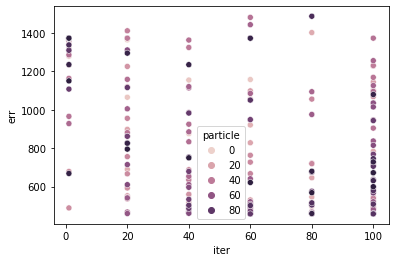

In [58]:
sns.scatterplot(data=a.loc[a.iter.isin([1,20,40,60,80,100])], x="iter", y="err", hue="particle")
plt.show()

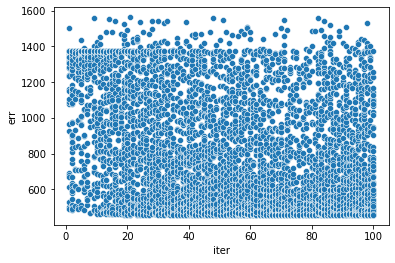

In [8]:
sns.scatterplot(data=pso_df, x="iter", y="err")
plt.show()

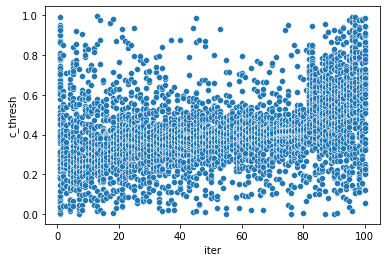

In [21]:
sns.scatterplot(data=pso_df, x="iter", y="c_thresh")
plt.show()

In [22]:
param_vec = np.loadtxt('/home1/beigejin/MyCMR2/Modeling/CMR2/fitting/' + folder + 'outfiles/xoptb.txt')
prams = param_vec_to_dict(param_vec)
prams

In [51]:
prams.update({i:test[i].item() for i in what_to_fit})
prams

{'beta_enc': 0.473737751395205,
 'beta_rec': 0.8779782892734264,
 'beta_rec_post': 0.9893388658553455,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.9019368883610578,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.41696783192278747,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 2.259066103431525,
 'gamma_fc': 0.29852489493940726,
 'gamma_cf': 0.5,
 'dt_tau': 0.01,
 'sq_dt_tau': 0.1}

### Run CMR2 on the Best Params

In [23]:
import CMR2_jbg as cmr
pd.set_option('display.max_columns', None)
np.set_printoptions(edgeitems=20, linewidth=200,precision=4)

In [24]:
rng = np.random.default_rng(seed=42)

In [52]:
# import recognition dataframe
with open("/home1/beigejin/Recog_David/data_als/data_df_clean.pkl", 'rb') as inp:
    df = pickle.load(inp)
df

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length,itemno,session
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0,NaN,0,53,0
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0,NaN,0,26,0
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0,NaN,0,33,0
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0,NaN,1,151,0
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0,NaN,0,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337333,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0,18.0,18,60,350
337508,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1,23.0,23,10,350
337682,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1,19.0,19,265,350
337870,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0,NaN,23,213,350


In [53]:
s_mat = np.load('/home1/beigejin/Recog_David/data_als/semantic_mat_fasttext.npy')

In [54]:
df_simu = cmr.run_continuous_recog_multi_sess(prams,df,s_mat)
df_simu

CMR Time: 139.1568627357483


,session,position,itemno,s_resp,s_rt,csim
57307,0,0,53,0.0,1091.618652,0.000000
57766,0,1,26,0.0,1266.586792,0.065808
58224,0,2,33,0.0,1279.703735,0.070368
58695,0,3,151,0.0,1285.704224,0.072439
59159,0,4,187,0.0,1294.242065,0.075369
...,...,...,...,...,...,...
337333,350,575,60,0.0,1293.080322,0.074972
337508,350,576,10,0.0,1287.882080,0.073188
337682,350,577,265,0.0,1290.271729,0.074009
337870,350,578,213,0.0,1284.622192,0.072067


In [55]:
df_new = df_simu.merge(df,on=['session','position','itemno'])
df_new

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length
0,0,0,53,0.0,1091.618652,0.000000,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,False,0,NaN,0
1,0,1,26,0.0,1266.586792,0.065808,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,False,0,NaN,0
2,0,2,33,0.0,1279.703735,0.070368,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,False,0,NaN,0
3,0,3,151,0.0,1285.704224,0.072439,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,False,0,NaN,1
4,0,4,187,0.0,1294.242065,0.075369,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,False,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203575,350,575,60,0.0,1293.080322,0.074972,1911.000,656,COLA,37,Beverages,2.0,Beverages,True,0,18.0,18
203576,350,576,10,0.0,1287.882080,0.073188,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23
203577,350,577,265,0.0,1290.271729,0.074009,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19
203578,350,578,213,0.0,1284.622192,0.072067,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,True,0,NaN,23


array([[<AxesSubplot:title={'center':'s_rt'}>]], dtype=object)

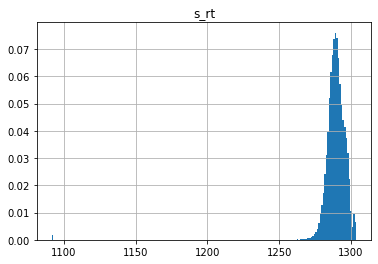

In [64]:
df_new.hist(column = 's_rt', bins=200, cumulative=False, density=1)

<AxesSubplot:xlabel='csim', ylabel='s_rt'>

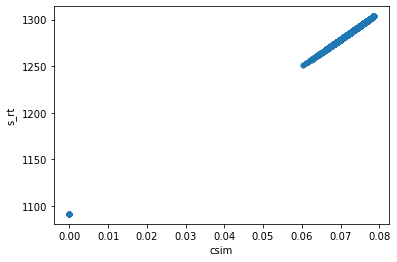

In [62]:
df_new.plot.scatter(x='csim', y='s_rt')

In [29]:
f = folder.rstrip("/")

In [30]:
with open('/home1/beigejin/Recog_David/data_als/data_df_simu_' + f + '.pkl', 'wb') as outp:
    pickle.dump(df_new, outp, pickle.HIGHEST_PROTOCOL)

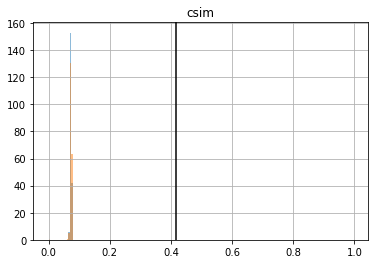

In [59]:
bin_arr = np.arange(0,1,0.005)
df_tar = df_new.loc[df_new.old == True]
df_lure = df_new.loc[df_new.old == False]

fig, ax = plt.subplots()
df_tar.hist(column = 'csim', bins=bin_arr, ax = ax, density = True,alpha=0.5)
df_lure.hist(column = 'csim', bins=bin_arr, ax = ax, density = True, alpha=0.5)
plt.axvline(prams["c_thresh"], color = 'k')
plt.show()

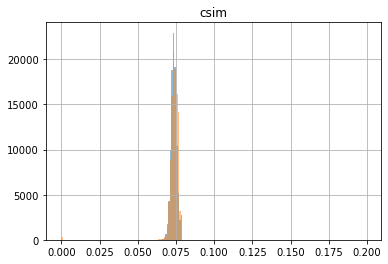

In [60]:
bin_arr = np.arange(0,0.2,0.001)
df_tar = df_new.loc[df_new.old == True]
df_lure = df_new.loc[df_new.old == False]

fig, ax = plt.subplots()
df_tar.hist(column = 'csim', bins=bin_arr, ax = ax, density = False,alpha=0.5)
df_lure.hist(column = 'csim', bins=bin_arr, ax = ax, density = False, alpha=0.5)
# plt.axvline(c, color = 'k')
plt.show()

In [35]:
#######

In [35]:
df = df_new

In [36]:
df_new = df.loc[df.old == False]
tar_far = df_new.yes.mean()
tar_far

0.18440818944156714

In [33]:
df_new

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length,itemno,session
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0,NaN,0,53,0
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0,NaN,0,26,0
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0,NaN,0,33,0
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0,NaN,1,151,0
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0,NaN,0,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331613,1612.000,656,RUM,0,Beverages,2.0,Beverages,545,False,0,8.0,8,226,350
332252,NaN,656,WINE,0,Beverages,NaN,Beverages,548,False,<NA>,10.0,10,297,350
332458,401.000,656,MILK,0,Beverages,2.0,Beverages,549,False,0,11.0,11,166,350
333257,1308.000,656,TEA,0,Beverages,2.0,Beverages,553,False,0,13.0,13,265,350


In [37]:
c = 0.37
csim_new = df_new.csim.to_numpy()
far = np.sum(csim_new > c) / len(csim_new)
far

0.6551661918328585

In [38]:
df_old = df.loc[df.old == True]
tar_hr = df_old.yes.mean()
tar_hr

0.798651476400837

In [39]:
csim_old = df_old.csim.to_numpy()
hr = np.sum(csim_old > c) / len(csim_old)
hr

0.9273707773707773